In [1]:
import numpy as np
import numpy 
import scipy.linalg as scplinalg
import numpy.linalg as LA
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
from sympy.plotting.plot import Plot, ContourSeries
from math import log

In [2]:
x1, x2, x3, x4, x5, x6 = sym.symbols("x1 x2 x3 x4 x5 x6")
z1, z2 = sym.symbols("z1 z2")

## Creating circles 

In [3]:
circle = sym.Matrix([[(z1-x1)**2+(z2-x2)**2-x3**2]])
gradCircle = circle.jacobian([x1,x2,x3])
circle1 = sym.Matrix([[(z1-x1)**2+(z2-x2)**2-x3**2]])
circle2 = sym.Matrix([[(z1-x1)**2+(z2-x2)**2-x3**2]])

In [4]:
def cirlceFunction(radius, centerx, centery, circleFunc):
    return circleFunc.subs({x1: centerx, x2: centery, x3: radius})

In [5]:
circle1 = cirlceFunction(radius = 2, centerx = -2, centery = -1, circleFunc = circle1)
circle2 = cirlceFunction(radius = 2, centerx = 2, centery = 2, circleFunc = circle2)


## Generating test data

In [6]:
nPoints = 50 # Number of points
np.random.seed(11) # Setting a seed for reproducibility
Zx = np.random.uniform(-5,5, nPoints) # Generating the points x-values
Zy = np.random.uniform(-5, 5, nPoints) # Generating the points y-vales

In [7]:
def classifiy(Zx, Zy, f, g): 
    """
    Classifies the points
    
    (Assumes f and g to be disjunct)
    
    Input: 
    Zx: List of x-coordinates (1xn)
    Zy: List of y-coordinates (1xn)
    f: Classfier function
    g: Classifier function
    
    Output:
    Classes: If ith vector definied by Zx and Zy has f-value less than 0 class is 0, else class is 1. 
    """
    
    classes = []
    for i in range(len(Zx)):
        if f.subs({z1: Zx[i], z2: Zy[i]})[0] < 0:
            classes.append(1)
        elif g.subs({z1: Zx[i], z2: Zy[i]})[0] < 0:
            classes.append(2)
        else:
            classes.append(3)

    return classes

In [8]:
def seperate(Zx, Zy, classes):
    """
    Splits Zx and Zy by classes
    
    Input: 
    Zx: List of x-coordinates (1xn)
    Zy: List of y-coordinates (1xn)
    classes: List of 1 and 0
    
    Output:
    Za: 2xm, contains all points that have class 1
    Zb: 2x(n-m), contains all points that havel class 2
    Zc: 2x(n-m), contains all points that havel class 0
    """
    
    
    Z1 = [[],[]]
    Z2 = [[],[]]
    Z3 = [[],[]]

    for i in range(len(Zx)):
        if classes[i] == 1:
            Z1[0].append(Zx[i])
            Z1[1].append(Zy[i])
        elif classes[i] == 2:
            Z2[0].append(Zx[i])
            Z2[1].append(Zy[i])
        else:
            Z3[0].append(Zx[i])
            Z3[1].append(Zy[i])
    return np.array(Z1), np.array(Z2), np.array(Z3)

In [9]:
def addNoise(Zx, Zy, noiseSize = 0.5):
        """
        Zx: List of x-coordinates (1xn)
        Zy: List of y-coordinates (1xn)
        noiseSize: Maximum size of noise
        
        """
        noiseX = np.random.normal(0,noiseSize,len(Zx))
        noiseY = np.random.normal(0,noiseSize,len(Zy))
        return Zx + noiseX, Zy + noiseY
        

In [10]:
classes = classifiy(Zx, Zy, circle1, circle2)
ZxNoise, ZyNoise = addNoise(Zx,Zy) # Adding noise to test data
Za, Zb, Zc  = seperate(Zx, Zy, classes) # Separting test data

# Plotting circles

In [11]:
def plot_scatter(X, Y, classes, xlim = 100, ylim = 100):
    """
    Generate scatter plot of point by class
   
    Input:
    X - X coordinates
    Y - Y coordinates
    Classes - class of point
    """
    
    plt.scatter(X, Y, c=classes)
    plt.xlim(-xlim,xlim)
    plt.ylim(-ylim,ylim)

In [12]:
def plot_circle(circleFunction, xlim=100, ylim=100, resolution = 100):
    """
    Creates a countour level plot of circle
    
    """
    f = sym.lambdify((z1, z2), circleFunction[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
    plt.contour(xmesh, ymesh, f(xmesh, ymesh), [0])
    

In [13]:
def plot_circle_coordinates(point, xlim=100, ylim=100, resolution = 100):
    """
    Creates contour level plot of two circles given two circle coordinates
    """
    circ1 = cirlceFunction(radius = point[2], centerx = point[0], centery = point[1], circleFunc = circle)
    circ2 = cirlceFunction(radius = point[5], centerx = point[3], centery = point[4], circleFunc = circle)
    f = sym.lambdify((z1, z2), circ1[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
   
    g = sym.lambdify((z1, z2), circ2[0], 'numpy')
    xl = np.linspace(-xlim,xlim, resolution)
    yl = np.linspace(-ylim,ylim, resolution)
    xmeshl, ymeshl = numpy.meshgrid(xl, yl)
    
    plt.contour(xmeshl, ymeshl, g(xmeshl, ymeshl), [0])
    plt.contour(xmesh, ymesh, f(xmesh, ymesh), [0])


def plot_save(point, X, Y,  plotname, xlim=10, ylim=10, npoints=100):
    #Saves the plot to a .jpg file taking the plot name as part of the input
    plt.scatter(X, Y, c=classes)
    plt.xlim(-xlim,xlim)
    plt.ylim(-ylim,ylim)
    
    
    circ1 = cirlceFunction(radius = point[2], centerx = point[0], centery = point[1], circleFunc = circle)
    circ2 = cirlceFunction(radius = point[5], centerx = point[3], centery = point[4], circleFunc = circle)
    f = sym.lambdify((z1, z2), circ1[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
   
    g = sym.lambdify((z1, z2), circ2[0], 'numpy')
    xl = np.linspace(-xlim,xlim, resolution)
    yl = np.linspace(-ylim,ylim, resolution)
    xmeshl, ymeshl = numpy.meshgrid(xl, yl)
    
    plt.contour(xmeshl, ymeshl, g(xmeshl, ymeshl), [0])
    plt.contour(xmesh, ymesh, f(xmesh, ymesh), [0])
    
    #Plots true circles
    c1 = sym.lambdify((z1, z2), circleFunction[0], 'numpy')
    c2 = sym.lambdify((z1, z2), circleFunction[0], 'numpy')
    xp = np.linspace(-xlim,xlim, resolution)
    yp = np.linspace(-ylim,ylim, resolution)
    xmesh, ymesh = numpy.meshgrid(xp, yp)
    plt.contour(xmesh, ymesh, c1(xmesh, ymesh), [0], colors = 'red')
    plt.contour(xmesh, ymesh, c2(xmesh, ymesh), [0], colors = 'g')
    plt.savefig(directory+plotname+".jpg")
    
    
def linePlotListSegmenter(plotlist):
    #Takes the list of information that we wish to plot and subdivides it into smaller lists
    #print("This is plotlist in plotinfosegmenter", plotlist)
    xlist = []
    f1list = []
    logbarrierlist = []
    alfalist = []
    #print(int(len(plotlist)/4))
    for i in range(4, len(plotlist), 4):
        #print("This is plotlist element I", plotlist[i-1])
        xlist+=[plotlist[i-4]]
        f1list+=[plotlist[i-3]]
        logbarrierlist += [plotlist[i-2]]
        #print("This is the logbarrier value added to the list", [plotlist[i-2]])
        #print([plotlist[i+3]])
        alfalist+=[plotlist[i-1]]
    return xlist, f1list, logbarrierlist, alfalist

def sentinelRemover(list1):
    #Removes the sentinel values in a list
    for i in range(len(list1)):
        if(list1[i]=='sentinel'):
            list1[i]=0
    return list1

def changeInXNorm(xlist):
    #Takes in a list of x-values and returns a list of delta x
    xnextToLast = xlist[-2]
    
    for i in range(len(xlist)-1):
        xlist[i] = columnNorm((xlist[i+1]-xlist[i]))[0]
    
    xlist[-1] = columnNorm((xlist[-1]-xnextToLast))[0]
    return xlist

def linePlot(listOfPointsf1, listOfPointsf2, ylabel, title, logscale):
    plt.plot(listOfPointsf1, label = "f1")
    plt.plot(listOfPointsf2, label = "f2")
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.title(title)
    if(logscale):
        plt.yscale('log')
    plt.legend()
    plt.savefig(directory+title+".jpg")
    plt.show()
    

## Defining f3 and gradF3

In [14]:
def f3(X):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    X6 = X.item(5,0)
    
    res = 0
    for i in range(len(Za[0])):
        res += (np.maximum(circle.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3})[0],0))**2
        res += (np.minimum(circle.subs({z1: Za[0][i], z2: Za[1][i], x1: X4, x2: X5, x3: X6})[0],0))**2

    for i in range(len(Zb[0])):
        res += (np.maximum(circle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X4, x2: X5, x3: X6})[0],0))**2
        res += (np.minimum(circle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3})[0],0))**2
    
    for i in range(len(Zc[0])):
        res += (np.minimum(circle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X4, x2: X5, x3: X6})[0],0))**2
        res += (np.minimum(circle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X1, x2: X2, x3: X3})[0],0))**2

    return res
    

In [15]:
def gradf3(X):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    X6 = X.item(5,0)
    
    tempGrad1 = np.array([[0]*3])
    tempGrad2 = np.array([[0]*3])

    for i in range(len(Za[0])):
        tempGrad2 = tempGrad2 + 2 * (np.minimum(circle.subs({z1: Za[0][i], z2: Za[1][i], x1: X4, x2: X5, x3: X6})[0],0))*gradCircle.subs({z1: Za[0][i], z2: Za[1][i], x1: X4, x2: X5, x3: X6})
        tempGrad1 = tempGrad1 + 2 * (np.maximum(circle.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3})[0],0))*gradCircle.subs({z1: Za[0][i], z2: Za[1][i], x1: X1, x2: X2, x3: X3})
    
    for i in range(len(Zb[0])):
        tempGrad2 += 2 * (np.maximum(circle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X4, x2: X5, x3: X6})[0],0))*gradCircle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X4, x2: X5, x3: X6})
        tempGrad1 += 2 * (np.minimum(circle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3})[0],0))*gradCircle.subs({z1: Zb[0][i], z2: Zb[1][i], x1: X1, x2: X2, x3: X3})
    
    for i in range(len(Zc[0])):
        tempGrad2 += 2 * (np.minimum(circle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X4, x2: X5, x3: X6})[0],0))*gradCircle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X4, x2: X5, x3: X6})
        tempGrad1 += 2 * (np.minimum(circle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X1, x2: X2, x3: X3})[0],0))*gradCircle.subs({z1: Zc[0][i], z2: Zc[1][i], x1: X1, x2: X2, x3: X3})

    grad = np.append(tempGrad1, tempGrad2)
    return (grad.astype(float)).reshape(6,1)
    

## Constraints

In [16]:
constraint1 = sym.Matrix([[x3]])
constraint2 = sym.Matrix([[x6]])
constraint3 = sym.Matrix([[((x1-x4)**2+(x2-x5)**2)**(1/2)-x3-x6]])

gradConstraint1 = constraint1.jacobian([x1,x2,x3,x4,x5,x6])
gradConstraint2 = constraint2.jacobian([x1,x2,x3,x4,x5,x6])
gradConstraint3 = constraint3.jacobian([x1,x2,x3,x4,x5,x6])

In [17]:
def logbarrier(X, mu):
    X = np.array(X)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    X6 = X.item(5,0)

    consVal = 0.0
    
    consVal1 = constraint1.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0]
    consVal2 = constraint2.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0]
    consVal3 = constraint3.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0]

    if consVal1 < 1e-20:
        consVal1 = 1e-20
    if consVal2 < 1e-20:
        consVal2 = 1e-20
    if consVal3 < 1e-20:
        consVal3 = 1e-20

    consVal += log(consVal1)
    consVal += log(consVal2)
    consVal += log(consVal3)


    
    return f3(X) - mu*consVal

In [18]:
def gradLogBarrier(x, muk, lam):
    X = np.array(x)
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    X6 = X.item(5,0)

        
    gradCons = lam[0]*np.array(gradConstraint1.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})).astype(float)[0].reshape(6,1)
    gradCons = gradCons + lam[1]*np.array(gradConstraint2.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})).astype(float)[0].reshape(6,1)
    gradCons = gradCons + lam[2]*np.array(gradConstraint3.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})).astype(float)[0].reshape(6,1)

    return gradf3(X) - gradCons


        

In [19]:
def columnNorm(X):
    val = 0
    for v in X:
        #print("column", v)
        val += v**2
    return (val**(1/2))

In [20]:
def outOfSet(X):
    #Returns false if we are in the set and true if we are outside it
    X1, X2, X3, X4, X5, X6 = X[0], X[1], X[2], X[3], X[4], X[5]
    
    if X3 <= 0 or X6 <= 0:
        return True

    consVal3 = constraint3.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0]

    if(consVal3 < 0):
        return True
  
    return False


In [21]:
def zoom(alo, ahi, thet0, derThet0, xk, pk, mu):
    repeating = True
    i = 0
    thetAjOld = 100
    while repeating:
        i += 1
        aj = (alo + ahi)/2
        
       # derAlo = derPhi(alo, pk, xk, Za, Zb, lam, mu, beta)
        #derAhi = derPhi(ahi, pk, xk, Za, Zb, lam, mu, beta)
        #funAlo = Fun(xk, Za, Zb, y, lam, mu, beta, pk, alo)
        #funAhi = Fun(xk, Za, Zb, y, lam, mu, beta, pk, ahi)
        #d1 = derAlo + derAhi - 3*(funAlo - funAhi)/(alo - ahi)
        #d2 = (ahi-alo)/np.abs(ahi-alo)*(d1**2-derAlo*derAhi)**(1/2)
        #aj = ahi - (ahi-alo)*(derAhi+d2-d1)/(derAhi-derAlo+2*d2)
    
        
        thetAj = Fun(aj, pk, xk, Za, Zb, lam, mu, beta, aLim)
        print("Zoom with direction:", pk)
        print("Zoom with point: ", xk)

        
        #Stopping cond.
        print("Thetaj", thetAj)
        print("ThetajOld", thetAjOld)

        if np.abs(thetAj-thetAjOld) < 1e-5:
            print("Plateu, zoom flag")
            return aj, True
        
        thetAjOld = thetAj
        print("Aj", aj)
        print("alo", alo)
        print("Functionvalue during zoom", thetAj)
        print("Check1",  thetAj > thet0 + c1*aj*derThet0 or thetAj >= Fun(alo, pk, xk, Za, Zb, lam, mu, beta, aLim))
        print(thetAj > thet0 + c1*aj*derThet0)
        print(thetAj >= Fun(alo, pk, xk, Za, Zb, lam, mu, beta, aLim))
        if thetAj > thet0 + c1*aj*derThet0 or thetAj >= Fun(alo, pk, xk, Za, Zb, lam, mu, beta, aLim, aLim):
            ahi = aj 
        else:
            print("Bot")
            derThetAj = gradLagPhi(aj, pk, xk, Za, Zb, lam, mu, beta, aLim)
            print("DerThetAJ", derThetAj)
            print("abs of DerThetAJ", np.abs(derThetAj))
            print("-c2*derthet0", -c2*derThet0)
            print("check3", np.abs(derThetAj) <= -c2*derThet0)
            if np.abs(derThetAj) <= -c2*derThet0:
                astar = aj
                print("Zom return, non flag")
                return astar, False
            if derThetAj*(ahi - alo)>= 0:
                ahi = alo
            
            alo = aj


In [22]:
def armijoLineseach(xk, pk, muk, lam, ainit):
    fxapk = logbarrier(xk + ainit *pk, muk)
    fxk = logbarrier(xk, muk)
    gradxkpk = ((gradLogBarrier(xk, muk, lam).T).astype(float) @ (pk))[0]
    c1alfagradxkpk = (c1*ainit*gradxkpk)
    
    #print("c1*ainit*gradxkpk",c1, ainit, gradxkpk, c1*ainit*gradxkpk)
    #print("fxapk", fxapk)
    #print("fxk", fxk)
    #print("gradxkpk", gradxkpk)
    #print("c1alfagradxkpk", c1alfagradxkpk)
    #print("fxk + c1alfagradxkpk", fxk + c1alfagradxkpk)

    counter = 0
    while not fxapk <= fxk + c1alfagradxkpk:
        counter += 1
        ainit = contracFac * ainit
        c1alfagradxkpk = (c1*ainit*gradxkpk)
        fxapk = logbarrier(xk + ainit *pk, muk)
        if ainit < 1e-15:
            return ainit, True
    
    xnext = xk + ainit*pk
    if(outOfSet(xnext)):
        return armijoLineseach(xk, pk, muk, lam, ainit*contracFac)
    
    return ainit, False

In [23]:
def bfgs(X,muk, lam, tk):
    xk = X.reshape(6,1)
    hk = np.identity(6)
    identity = np.identity(6)
    
    
    pointList =[]
    gradList = []
    hessList = []
    valueList = []
    
    counter = 0
    repeat = True
    while repeat:
        funcvalue = logbarrier(xk, muk)
        print("This is the function value at the start of a bfgs iteration", funcvalue)
        if(funcvalue < 0):
            return xk, False
        
        valueList.append(funcvalue)
        grad = gradLogBarrier(xk, muk, lam)

        print("ColumNorm(grad)", columnNorm(grad))
        if columnNorm(grad) < tk:
            return xk, False
        
        print("grad before in bfsg", grad)
        #print("xk before appending to pointlist", xk)
        pointList += [xk]
        gradList += [grad]
        hessList += [hk]
        pk = (-hk.astype(float)@grad.astype(float)).reshape(6,1)
        print("This is pk found in BFGS linesearch", pk)
        #print("This is xk before linesearch", xk)
        alfa, flag = armijoLineseach(xk, pk, muk, lam, 5)
        #alfa, flag = linesearch(augementedLagrangianInDirection, gradLagPhi, 10, xk, pk, Za, Zb, c1, c2, y, lam, mu, beta)
        print("alfa bfgs", alfa)
        #print("alfa*pk",alfa*pk)
        
        
        if flag:
            return xk, True
        
        xk = (xk + alfa*pk).reshape(6,1)
        print("xk bfgs", xk)
        print("xk out of set", outOfSet(xk))

        #xk = projection(xk, lower, upper)
        #print("this is pointlist", pointList)
        sk = ((xk - pointList[counter]).reshape(6,1))
        sk = sk.astype(float)

        #print("sk", sk)
        #print("xkproj", xk)

        yk =  (gradLogBarrier(xk, muk, lam).reshape(6,1) - gradList[counter])
        yk = yk.astype(float)
        
        #print("Da skt multiple:", (sk.T @ yk)[0])
        #print("da second",((c2-1)*alfa*(grad.T)@pk)[0])
        if not (sk.T.astype(float) @ yk.astype(float))[0]> ((c2-1)*alfa*(grad.T.astype(float))@pk.astype(float))[0]:
            print("Curvature condition not satisfied")
            return xk, False
        
        #print("yk", (yk.T.astype(float)@sk.astype(float))[0])
        rhok = (1/(yk.T.astype(float)@sk.astype(float))[0])
        rhok = rhok.astype(float)

        #print("rhok", rhok)
        hk = (identity - rhok*(sk@yk.T))@hk@(identity - rhok*(sk@yk.T)) + rhok*(sk@sk.T)
        #print("print hk is", hk)
        
        counter += 1
        
        if counter > 4 and np.abs(valueList[counter-2]/valueList[counter-1]) > 0.99:
            print("Decrease slowing in bfgs")

        if(counter == 100):
            return xk, False

In [24]:
def unconstrainedBarrierMethod(X, muInit, tInit, lam):
    X1 = X.item(0,0)
    X2 = X.item(1,0)
    X3 = X.item(2,0)
    X4 = X.item(3,0)
    X5 = X.item(4,0)
    X6 = X.item(5,0)

    
    tk = tInit
    muk = muInit
    
    repeat = True
    while repeat:
        print("New iteration of unconstrained barrier method")
        print("Logbarrier is", logbarrier(X, muk)), 
        print("function value is,", f3(X))
        print("X is,", X)
        print("mu is", muk)
        
        if(logbarrier(X, muk) < 0):
            muk = muk * 0.8
            continue
        
        
        X, flag = bfgs(X,muk, lam,tk)
        
        if flag:
            print("BFGS flag inc mu")
            muk = muk * 10
            continue

        
        X = np.array(X)
        X1 = X.item(0,0)
        X2 = X.item(1,0)
        X3 = X.item(2,0)
        X4 = X.item(3,0)
        X5 = X.item(4,0)
        X6 = X.item(5,0)

        lam[0]  = muk/(constraint1.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0])
        lam[1]  = muk/(constraint2.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0])
        lam[2]  = muk/(constraint3.subs({x1: X1, x2: X2, x3:X3, x4:X4, x5:X5, x6: X6})[0])

        # Final end condition
        if f3(X) < 0.0001:
            return X
        
        muk = muk * 0.8
        tk = tk * 0.9
        
    

In [25]:
muInit = 1000
lamInit = [1,1,1]
tInit = 1
c1 = 1e-4
c2 = 0.9
contracFac = 0.5

Xinit = np.array([-7,-33,21,23,20,122]).reshape(6,1)

In [26]:
X = unconstrainedBarrierMethod(Xinit, muInit, tInit, lamInit)

New iteration of unconstrained barrier method
Logbarrier is 8123940282.66026
function value is, 8123902079.50189
X is, [[ -7]
 [-33]
 [ 21]
 [ 23]
 [ 20]
 [122]]
mu is 1000
This is the function value at the start of a bfgs iteration 8123940282.66026
ColumNorm(grad) [  2.94059634e+08]
grad before in bfsg [[ -3.98989021e+04]
 [ -2.38035890e+05]
 [ -1.55656922e+05]
 [ -5.55694482e+07]
 [ -4.63766294e+07]
 [  2.85012684e+08]]
This is pk found in BFGS linesearch [[  3.98989021e+04]
 [  2.38035890e+05]
 [  1.55656922e+05]
 [  5.55694482e+07]
 [  4.63766294e+07]
 [ -2.85012684e+08]]
alfa bfgs 2.980232238769531e-07
xk bfgs [[ -6.9881092 ]
 [-32.92905978]
 [ 21.04638938]
 [ 39.5609861 ]
 [ 33.8213126 ]
 [ 37.05960095]]
xk out of set False
This is the function value at the start of a bfgs iteration 9560298.70422863
ColumNorm(grad) [ 2033005.68248474]
grad before in bfsg [[  -39384.55665057]
 [ -234964.58704624]
 [ -154327.56858542]
 [ 1218467.78131889]
 [ 1046023.22291568]
 [-1213963.46284815]]


alfa bfgs 0.00244140625
xk bfgs [[ -0.27485167]
 [-11.70962642]
 [  8.72889474]
 [  5.63304547]
 [  6.513333  ]
 [  5.41787682]]
xk out of set False
This is the function value at the start of a bfgs iteration -6117.47205761557
New iteration of unconstrained barrier method
Logbarrier is -3250.78785892749
function value is, 8215.94893582481
X is, [[ -0.27485167]
 [-11.70962642]
 [  8.72889474]
 [  5.63304547]
 [  6.513333  ]
 [  5.41787682]]
mu is 2097.1520000000005
New iteration of unconstrained barrier method
Logbarrier is -957.440499977034
function value is, 8215.94893582481
X is, [[ -0.27485167]
 [-11.70962642]
 [  8.72889474]
 [  5.63304547]
 [  6.513333  ]
 [  5.41787682]]
mu is 1677.7216000000005
New iteration of unconstrained barrier method
Logbarrier is 877.237387183334
function value is, 8215.94893582481
X is, [[ -0.27485167]
 [-11.70962642]
 [  8.72889474]
 [  5.63304547]
 [  6.513333  ]
 [  5.41787682]]
mu is 1342.1772800000006
This is the function value at the start of a bfg

This is the function value at the start of a bfgs iteration -13.3787168143185
New iteration of unconstrained barrier method
Logbarrier is 1.58581492791217
function value is, 61.4439418968347
X is, [[-3.45722381]
 [-0.38442921]
 [ 0.8418887 ]
 [ 3.08354773]
 [ 2.10358925]
 [ 2.14703227]]
mu is 30.223145490365766
This is the function value at the start of a bfgs iteration 1.58581492791217
ColumNorm(grad) [112.762651623344]
grad before in bfsg [[-75.1252528266031]
 [24.7825099629728]
 [-69.9056755523296]
 [34.3253163931014]
 [19.8085306104001]
 [0.174596519202845]]
This is pk found in BFGS linesearch [[ 75.12525283]
 [-24.78250996]
 [ 69.90567555]
 [-34.32531639]
 [-19.80853061]
 [ -0.17459652]]
alfa bfgs 0.01953125
xk bfgs [[-1.98993371]
 [-0.86846261]
 [ 2.20723393]
 [ 2.41313139]
 [ 1.71670389]
 [ 2.14362218]]
xk out of set False
This is the function value at the start of a bfgs iteration -37.7552815289568
New iteration of unconstrained barrier method
Logbarrier is -30.0590258426161
fu

New iteration of unconstrained barrier method
Logbarrier is -0.101114436956878
function value is, 0.00191753702857251
X is, [[-2.06941787]
 [-0.92992948]
 [ 2.08449571]
 [ 2.0561885 ]
 [ 1.84781929]
 [ 1.79360898]]
mu is 0.07307508186654532
New iteration of unconstrained barrier method
Logbarrier is -0.0805080421597876
function value is, 0.00191753702857251
X is, [[-2.06941787]
 [-0.92992948]
 [ 2.08449571]
 [ 2.0561885 ]
 [ 1.84781929]
 [ 1.79360898]]
mu is 0.05846006549323626
New iteration of unconstrained barrier method
Logbarrier is -0.0640229263221156
function value is, 0.00191753702857251
X is, [[-2.06941787]
 [-0.92992948]
 [ 2.08449571]
 [ 2.0561885 ]
 [ 1.84781929]
 [ 1.79360898]]
mu is 0.04676805239458901
New iteration of unconstrained barrier method
Logbarrier is -0.0508348336519779
function value is, 0.00191753702857251
X is, [[-2.06941787]
 [-0.92992948]
 [ 2.08449571]
 [ 2.0561885 ]
 [ 1.84781929]
 [ 1.79360898]]
mu is 0.03741444191567121
New iteration of unconstrained ba

In [27]:
directory = ""

In [28]:
plotname = "f3_plot_init"

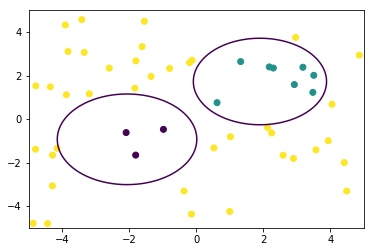

In [33]:
#Plotting X we found
plot_circle_coordinates(X, xlim = 5, ylim = 5)
plt.scatter(Zx, Zy, c=classes)
plt.savefig(directory+plotname+".jpg")

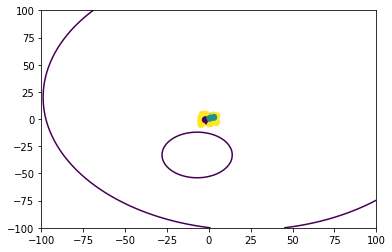

In [30]:
#Plotting starting point
plot_circle_coordinates(Xinit)
plt.scatter(Zx, Zy, c=classes)
plt.savefig(directory+plotname+".jpg")